1. K-Means Clustering:
- Load customer data.
- Check the number of cells in each column with null values.
- Create a scatter plot with Age as X and Spending Score as Y.
- Find out the best number for clusters between 1 and 10 (inclusive) using the elbowmethod.
- Draw a scatter plot displaying data points colored on the basis of clusters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('customers.csv')

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#checking for null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

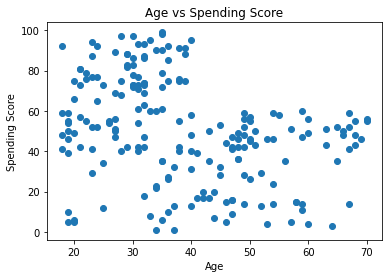

In [6]:
#Create a scatter plot with Age as X and Spending Score as Y

plt.scatter(df['Age'],df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending Score')
plt.show()

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans


In [9]:
#dropping customer id

cust = df.drop(columns='CustomerID')
cust.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
#encoding gender field
LE = LabelEncoder()

In [11]:
cust['Gender']=LE.fit_transform(cust.Gender)
cust.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


cluster is: 2
cluster is: 3
cluster is: 4
cluster is: 5
cluster is: 6
cluster is: 7
cluster is: 8
cluster is: 9
cluster is: 10


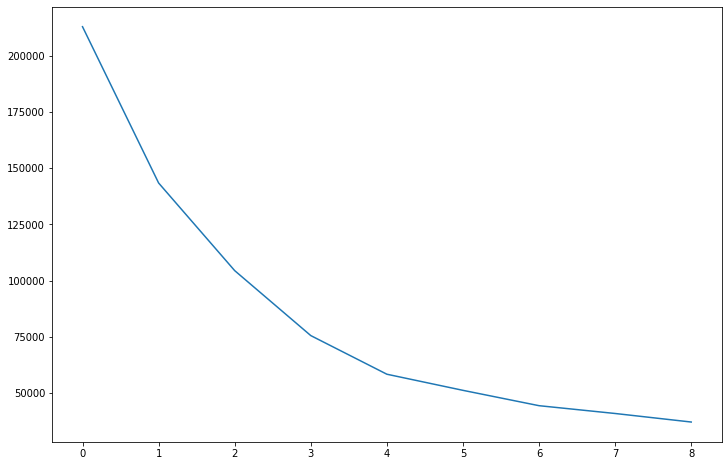

In [12]:
#creating model to find best number of clusters
ssd = []
for num_clusters in range(2,11):
    print('cluster is:',num_clusters)
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(cust)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.figure(figsize=(12,8))
plt.plot(ssd)



In [13]:
# from above elbow curve we can see after 4 curve is dropping suddenly. So no of clusters = 5 is the best model

kmeans_model = KMeans(n_clusters=5)
kmeans_model.fit(cust)

KMeans(n_clusters=5)

In [14]:
kmeans_model.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [15]:
cust['Cluster ID']=kmeans_model.labels_

In [16]:
cust.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster ID
0,1,19,15,39,4
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,2
4,0,31,17,40,4


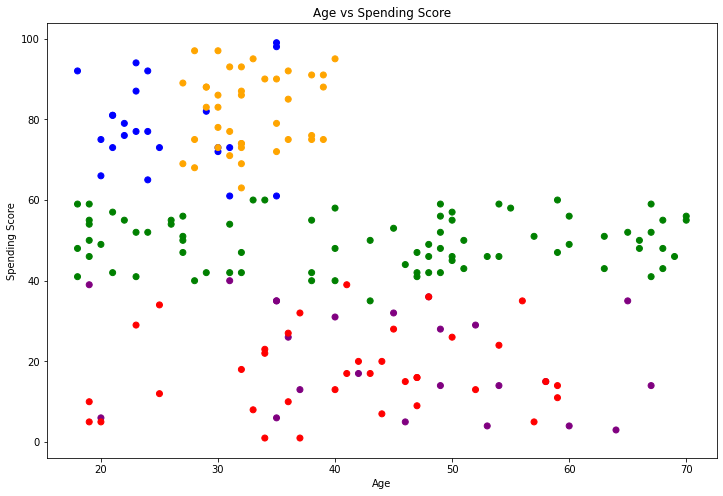

In [23]:
# Draw a scatter plot displaying data points colored on the basis of clusters.

colormap={0:'red',1:'green',2:'blue',3:'orange',4:'purple'}
plt.figure(figsize=(12,8))
plt.scatter(cust['Age'],cust['Spending Score (1-100)'],c=cust['Cluster ID'].map(colormap))
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending Score')
plt.show()